## Calibration

The purpose of this notebook is to calibrate the camera by:
* Computing the calibration matrix and distortion coefficients from chessboard images
* Applying a distortion correction to raw images

In [2]:
import os, math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/home/sketchc89/anaconda3/envs/sdc04/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Chessboards
* Three of the images were taken too close to find all of the corners


Found 17 chessboards in 20 images


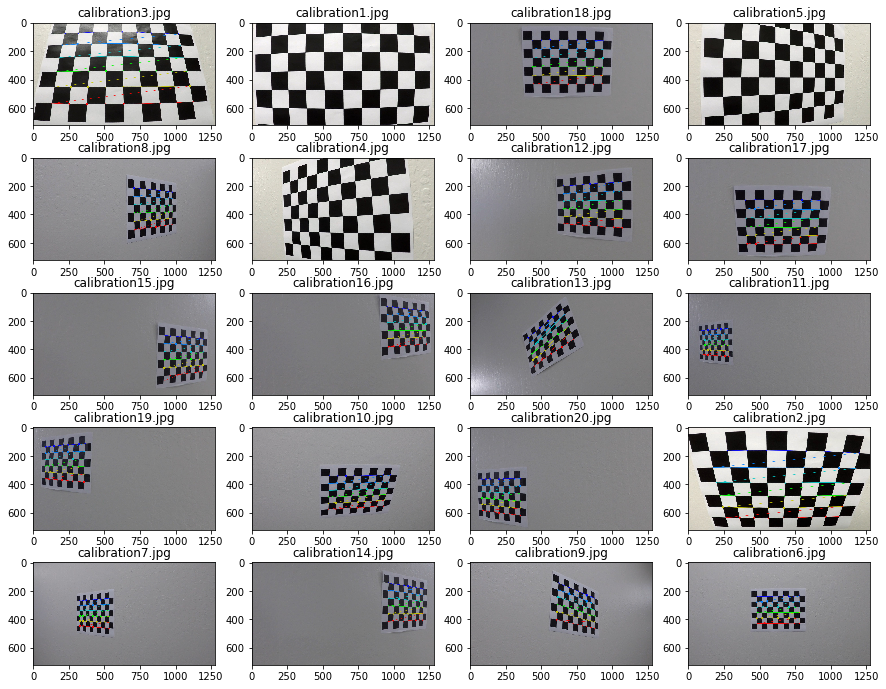

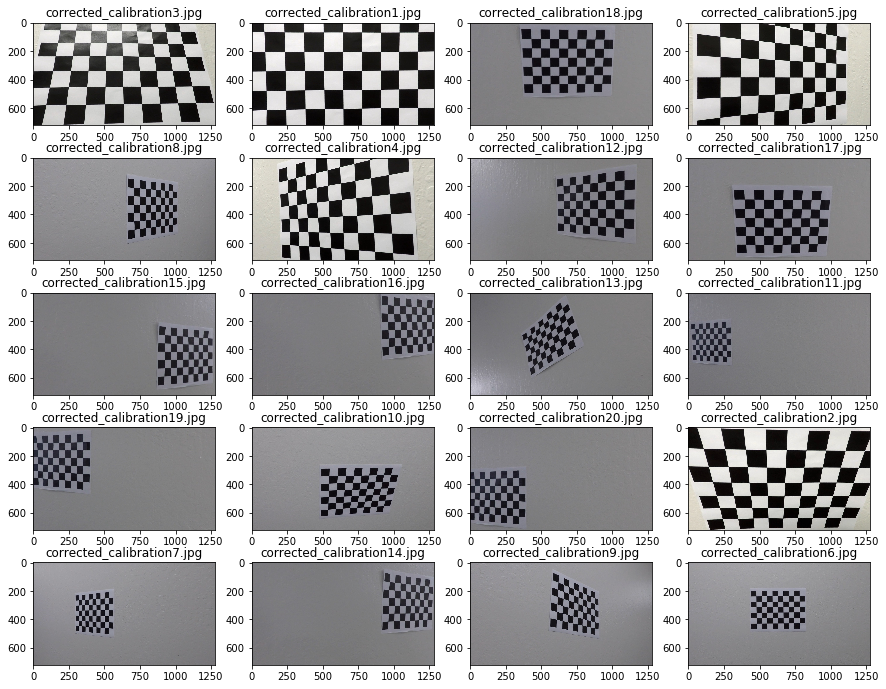

In [62]:
chess_w = 9
chess_l = 6
chess_counter = 0
obj_pts = []
img_pts = []

# cal_array = np.empty((20, 720, 1280))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.001)
obj_corners = np.zeros((chess_w*chess_l, 3), np.float32)
obj_corners[:,:2] = np.mgrid[0:chess_w,0:chess_l].T.reshape(-1,2)
fig = plt.figure(figsize=(15,12))
for i, cal_file in enumerate(os.listdir(os.path.join(os.getcwd(), 'camera_cal'))):
    cal_img = mpimg.imread(os.path.join(os.getcwd(), 'camera_cal', cal_file))
    gray_cal = cv2.cvtColor(cal_img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray_cal, (chess_w, chess_l), None)
    if ret == True:
        chess_counter += 1
        obj_pts.append(obj_corners)
        corners_2 = cv2.cornerSubPix(gray_cal, corners, (11,11), (-1,-1), criteria)
        img_pts.append(corners_2)
        cal_img = cv2.drawChessboardCorners(cal_img, (chess_w, chess_l), corners, ret)
    ax = plt.subplot(5, 4, i+1)
    ax.set_title(cal_file)
    plt.imshow(cal_img)
print('Found {0} chessboards in {1} images'.format(chess_counter, i+1))
plt.show()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, cal_img.shape[:-1], None, None)
fig2 = plt.figure(figsize=(15,12))
for i, cal_file in enumerate(os.listdir(os.path.join(os.getcwd(), 'camera_cal'))):
    cal_img = mpimg.imread(os.path.join(os.getcwd(), 'camera_cal', cal_file))
    dst = cv2.undistort(cal_img, mtx, dist, None, mtx)
    ax = plt.subplot(5, 4, i+1)
    ax.set_title('corrected_{0}'.format(cal_file))
    plt.imshow(dst)
plt.show()
